# instalar las librerias

In [ ]:
pip install pandas numpy matplotlib scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Para gráficos 3D
import os

El archivo existe. Cargando datos...
Columnas disponibles en el dataset:
Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')
Error Cuadrático Medio (MSE): 4820670323.927461
Coeficientes del modelo: [ 74421.66113328  12125.10064722 -11928.86071628  44847.8975588
 -45437.46827603  16926.78772445 -79012.00316122 -46595.95016072
 -15352.10273994 -31797.79157712  58827.3432839 ]
Intercepto del modelo: 206750.5367038861


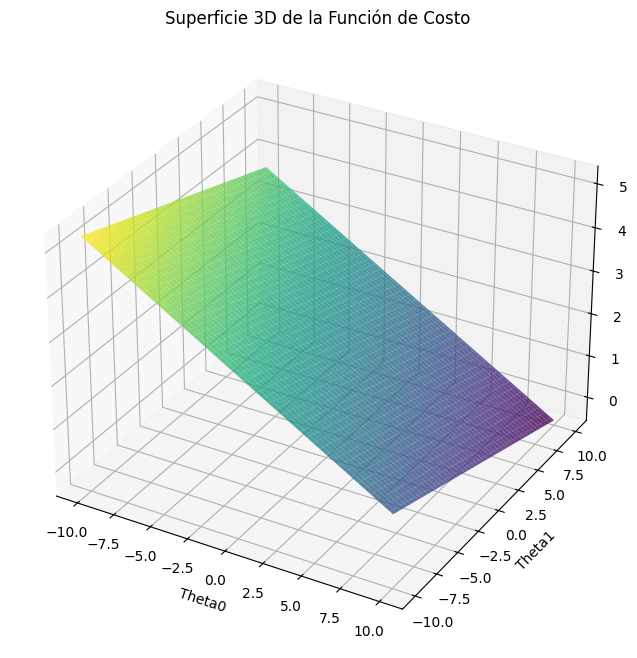

In [3]:
# Verificar si el archivo existe
ruta_archivo = 'California_Houses.csv'  # Asegúrate de que el nombre sea exacto
if not os.path.exists(ruta_archivo):
    print(f"El archivo no existe en la ruta: {os.path.abspath(ruta_archivo)}")
else:
    print(f"El archivo existe. Cargando datos...")
    data = pd.read_csv(ruta_archivo)

    # Imprimir los nombres de las columnas para verificar
    print("Columnas disponibles en el dataset:")
    print(data.columns)

    # Seleccionar características (features) y variable objetivo (target)
    features = data[['Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms', 
                     'Population', 'Households', 'Latitude', 'Longitude', 
                     'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego']]  # Columnas seleccionadas
    target = data['Median_House_Value']  # Variable objetivo

    # Normalizar las características
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Dividir el dataset en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar el modelo usando el Error Cuadrático Medio (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Error Cuadrático Medio (MSE): {mse}')

    # Mostrar los coeficientes del modelo
    print("Coeficientes del modelo:", model.coef_)
    print("Intercepto del modelo:", model.intercept_)

    # Graficar la superficie 3D de la función de costo
    # Para simplificar, usaremos solo dos características (Median_Income y Median_Age)
    X = features_scaled[:, :2]  # Seleccionar las primeras dos características
    y = target.values

    # Agregar una columna de unos para el término de sesgo (bias)
    X_b = np.c_[np.ones((len(X), 1)), X]

    # Función de costo (Error Cuadrático Medio)
    def calcular_costo(X, y, theta):
        m = len(y)
        predicciones = X.dot(theta)
        error = predicciones - y
        costo = (1 / (2 * m)) * np.sum(error ** 2)
        return costo

    # Crear una cuadrícula de valores para theta0, theta1 y theta2
    theta0_vals = np.linspace(-10, 10, 100)  # Rango de theta0
    theta1_vals = np.linspace(-10, 10, 100)  # Rango de theta1
    theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

    # Calcular el costo para cada combinación de theta0 y theta1 (theta2 se mantiene fijo en 0)
    costos = np.zeros((len(theta0_vals), len(theta1_vals)))
    for i in range(len(theta0_vals)):
        for j in range(len(theta1_vals)):
            theta = np.array([theta0_vals[i], theta1_vals[j], 0])  # theta2 se fija en 0
            costos[i, j] = calcular_costo(X_b, y, theta)

    # Graficar la superficie 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(theta0_grid, theta1_grid, costos.T, cmap='viridis', alpha=0.8)
    ax.set_xlabel('Theta0')
    ax.set_ylabel('Theta1')
    ax.set_zlabel('Costo (J)')
    ax.set_title('Superficie 3D de la Función de Costo')
    plt.show()